<a href="https://colab.research.google.com/github/bani1610/Machine-Learning-Praktikum/blob/main/Tugas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/praktikum-ml/Praktikum04/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

df = pd.read_csv(path +'/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [5]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


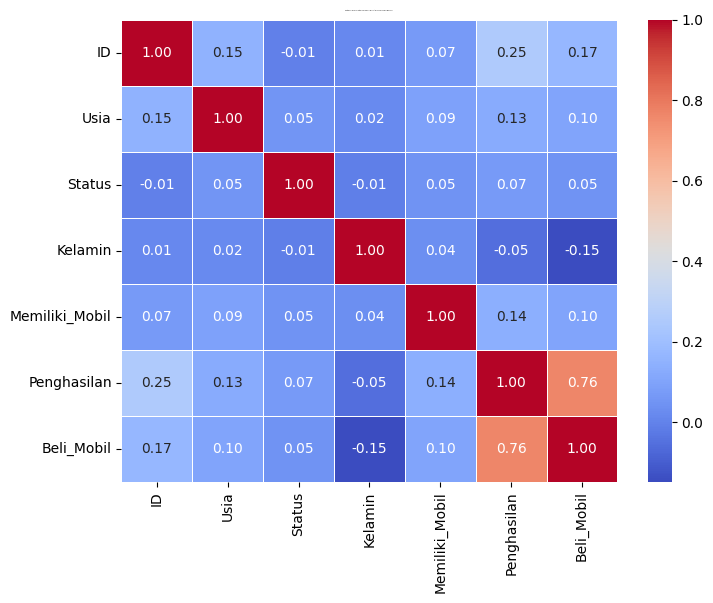

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antar variabel numerik terhadap Pembelian Mobil", fontsize=1)
plt.show()

In [17]:
feature_num = ['Penghasilan']
feature_cat = ['Status']


use_cols = feature_num + feature_cat + ['Beli_Mobil']
df_model = df[use_cols].dropna().copy()

X = df_model[feature_num + feature_cat]
y = df_model['Beli_Mobil']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 2)
y shape: (1000,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (800, 2)
Data uji: (200, 2)


In [33]:
praprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('cat', 'passthrough', feature_cat)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter = 1000,
    solver = 'lbfgs',
    class_weight = 'balanced',
    random_state=42
)

clf = Pipeline([
    ('praprocess', praprocess),
    ('model', model)
])

clf.fit(X_train, y_train)
print("model logistik berhasil dilatih")

model logistik berhasil dilatih


In [22]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

print(f"Akurasi        : {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi        : {precision_score(y_test, y_pred, zero_division=0):4f}")
print(f"Recall         : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score       : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC Score  : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi        : 0.9150
Presisi        : 0.974138
Recall         : 0.8898
F1 Score       : 0.9300
ROC AUC Score  : 0.9781


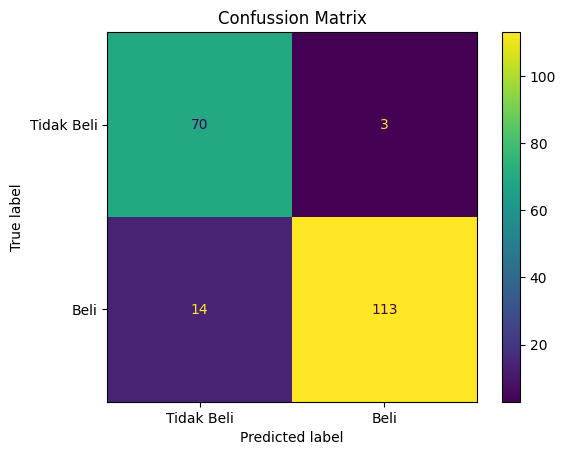

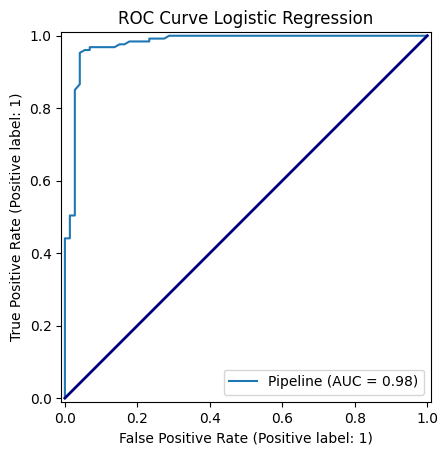

In [23]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Tidak Beli', 'Beli']
).plot(values_format='d')

plt.title("Confussion Matrix")
plt.show()

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-') # Changed linestyle to solid
plt.show()

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        73
           1       0.97      0.89      0.93       127

    accuracy                           0.92       200
   macro avg       0.90      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200



In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)

print("Skor tiap fold:", scores)
print("Skor rata-rata:", np.mean(scores))
print('Standar deviansi', np.std(scores))


Skor tiap fold: [0.8   0.93  0.965 0.965 0.965]
Skor rata-rata: 0.925
Standar deviansi 0.0639531078212779


In [26]:
feat_names = feature_num + feature_cat
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Feature': feat_names,
    'Coefficient': coefs,
    'Odds Ratio': odds
})

coef_df.sort_values(by='Odds Ratio', ascending=False, inplace=True)

display(coef_df)



,Feature,Coefficient,Odds Ratio
0,Penghasilan,4.465937,87.002535
1,Status,-0.145556,0.864542


In [30]:
data_baru = pd.DataFrame({
    'Penghasilan' : [364,130],
    'Status' : [1, 0],
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()

hasil['Prob_Beli'] = prob
hasil['Pred (0=Tidak Beli, 1=Beli)'] = pred

display(hasil)

,Penghasilan,Status,Prob_Beli,"Pred (0=Tidak Beli, 1=Beli)"
0,364,1,0.998210,1
1,130,0,0.010256,0
